In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("car_prices.csv")
df["profit"] = df["sellingprice"] - df["mmr"]

In [24]:
total = df["condition"].shape[0]
profit_amount = df[df["profit"] > 0].shape[0]

ratio = profit_amount / total * 100

# 0-10
total_0_10 = df[df["condition"] <= 10].shape[0]
amount_0_10 = df[(df["condition"] <= 10) & (df["profit"] > 0)].shape[0]
ratio_0_10 = amount_0_10 / total_0_10 * 100
ratio_0_10

38.60572602387983

In [25]:
# 11-20
total_11_20 = df[(df["condition"] >= 11) & (df["condition"] <= 20)].shape[0]
amount_11_20 = df[(df["condition"] >= 11) & (df["condition"] <= 20) & (df["profit"] > 0)].shape[0]
ratio_11_20 = amount_11_20 / total_11_20 * 100
ratio_11_20

21.536943099134668

In [26]:
# 21-30
total_21_30 = df[(df["condition"] >= 21) & (df["condition"] <= 30)].shape[0]
amount_21_30 = df[(df["condition"] >= 21) & (df["condition"] <= 30) & (df["profit"] > 0)].shape[0]
ratio_21_30 = amount_21_30 / total_21_30 * 100
ratio_21_30

34.37332139659803

In [27]:
# 31-40
total_31_40 = df[(df["condition"] >= 31) & (df["condition"] <= 40)].shape[0]
amount_31_40 = df[(df["condition"] >= 31) & (df["condition"] <= 40) & (df["profit"] > 0)].shape[0]
ratio_31_40 = amount_31_40 / total_31_40 * 100
ratio_31_40

50.326579084094114

In [28]:
# 41-50
total_41_50 = df[df["condition"] >= 41].shape[0]
amount_41_50 = df[(df["condition"] >= 41) & (df["profit"] > 0)].shape[0]
ratio_41_50 = amount_41_50 / total_41_50 * 100
ratio_41_50

62.42991004732048

In [29]:
profit = df[df["profit"] > 0].profit
odometer = df[df["profit"] > 0].odometer

Text(0, 0.5, 'Profit')

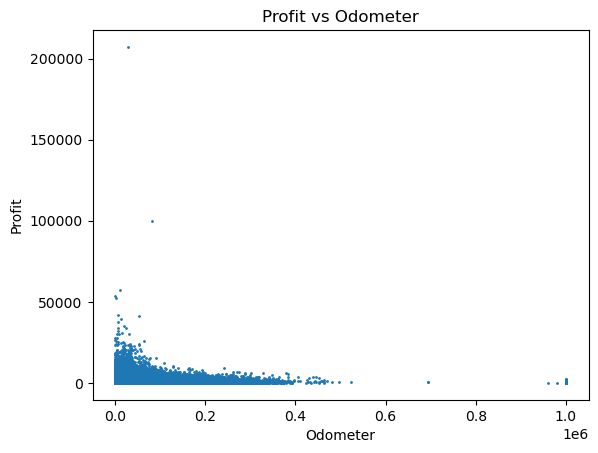

In [30]:
# dotplot: profit vs odometer 
x = odometer
y = profit
plt.scatter(x,y,s=1)
plt.title("Profit vs Odometer")
plt.xlabel("Odometer")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

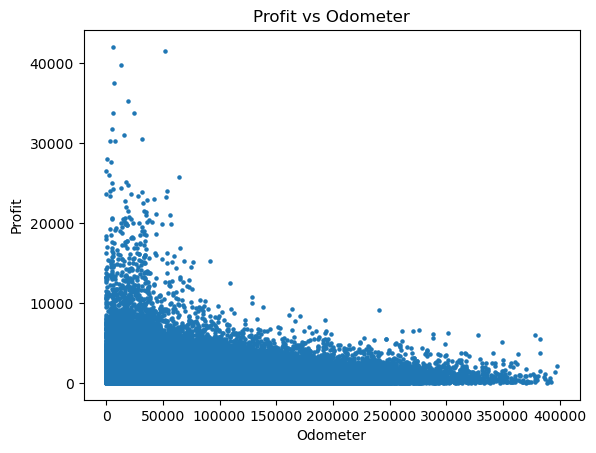

In [31]:
profit = df[(df["profit"] > 0) & (df["profit"] < 50000) & (df["odometer"] < 400000)].profit
odometer = df[(df["profit"] > 0) & (df["profit"] < 50000) & (df["odometer"] < 400000)].odometer
x = odometer
y = profit
plt.scatter(x,y,s=5)
plt.title("Profit vs Odometer")
plt.xlabel("Odometer")
plt.ylabel("Profit")

In [32]:
net_profit = df["profit"].sum()

[Text(0, 0, '38.61%'),
 Text(0, 0, '21.54%'),
 Text(0, 0, '34.37%'),
 Text(0, 0, '50.33%'),
 Text(0, 0, '62.43%')]

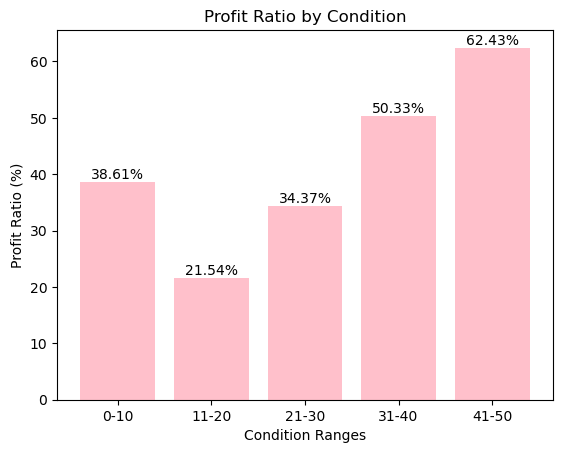

In [33]:
categories = ["0-10", "11-20", "21-30", "31-40", "41-50"]
profit_ratios = [38.61, 21.54, 34.37, 50.33, 62.43]

df_1 = pd.DataFrame({
    'Category': categories,
    'Profit Ratio': profit_ratios
})

ax = df_1.plot(kind='bar', x='Category', y='Profit Ratio', color='pink', legend=None, width=0.8)
plt.xlabel('Condition Ranges')
plt.ylabel('Profit Ratio (%)')
plt.title('Profit Ratio by Condition')
plt.xticks(rotation=0)  # Keeps the category labels horizontal

ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

(0.0, 1.0, 0.0, 1.0)

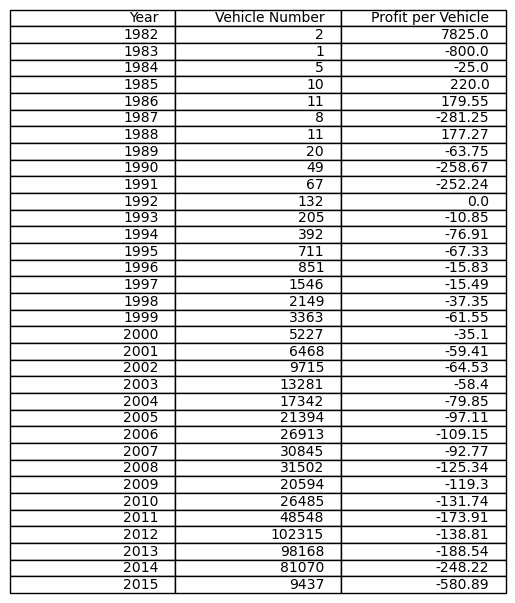

In [34]:
table = []
table.append(("Year", "Vehicle Number", "Profit per Vehicle"))
for i in range(1982, 2016):
    a = df[df["year"] == i]
    count = a.shape[0]
    total_year_profit = a["profit"].sum()
    average = total_year_profit / count
    average = round(average, 2)
    table.append((i, count, average))

plt.table(cellText=table, loc = "center")
plt.axis("off")

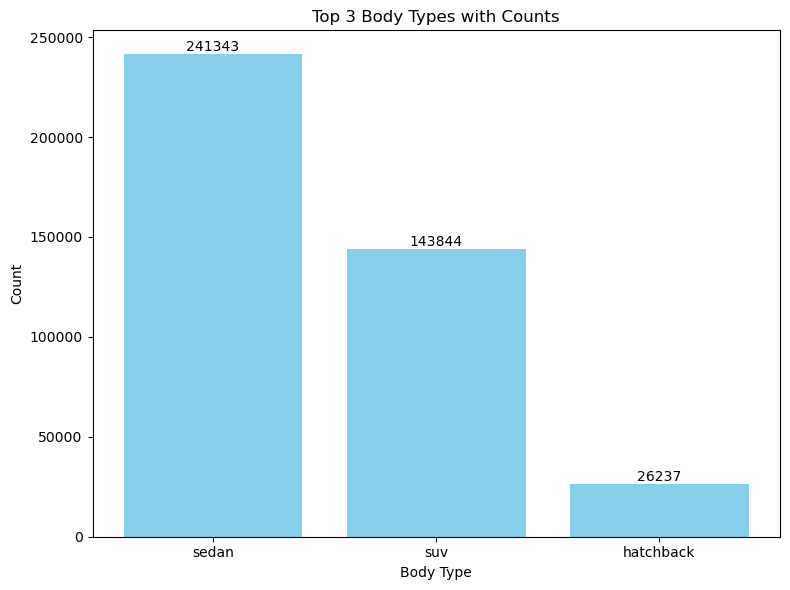

In [35]:
df["count"] = 1
grouped = df.groupby(df['body'].str.lower())['count'].sum()
dict_body = grouped.to_dict()
top_3 = sorted(dict_body.items(), key=lambda x: x[1], reverse=True)[:3]

categories = [category[0] for category in top_3]
counts = [category[1] for category in top_3]
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center')

plt.xlabel('Body Type')
plt.ylabel('Count')
plt.title('Top 3 Body Types with Counts')
plt.tight_layout()

In [36]:
grouped_brand = df.groupby(df['make'].str.lower())['profit'].sum()
dict_body = grouped_brand.to_dict()

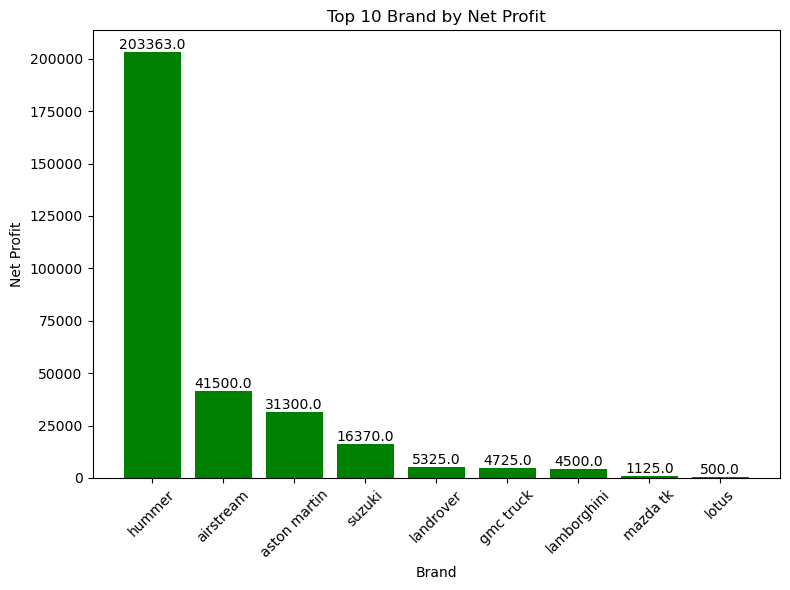

In [37]:
brand = sorted(dict_body.items(), key=lambda x: x[1], reverse=True)[:9]
categories = [category[0] for category in brand]
counts = [category[1] for category in brand]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color='green')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center')

plt.xlabel('Brand')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.title('Top 10 Brand by Net Profit')
plt.tight_layout()

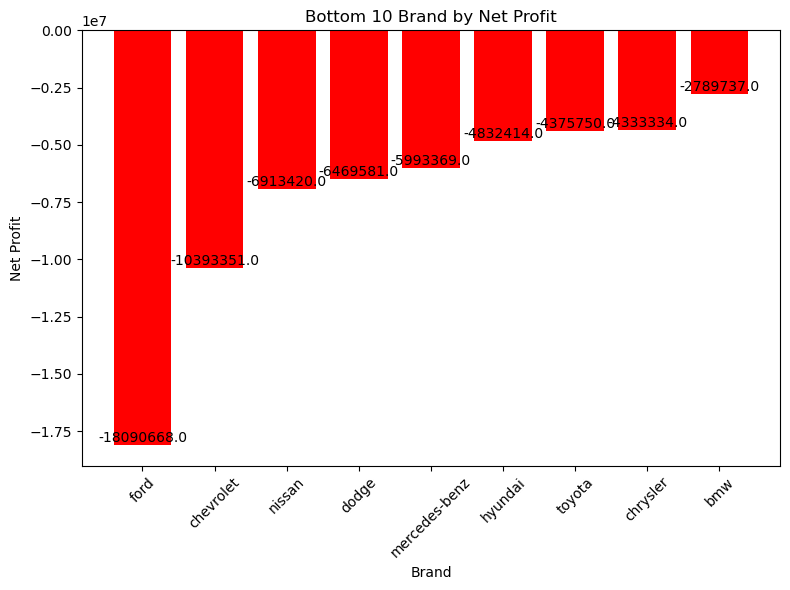

In [38]:
brand = sorted(dict_body.items(), key=lambda x: x[1], reverse=False)[:9]
categories = [category[0] for category in brand]
counts = [category[1] for category in brand]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color='red')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center')

plt.xlabel('Brand')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.title('Bottom 10 Brand by Net Profit')
plt.tight_layout()